In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)

In [2]:
train = pd.read_csv(r'D:\ML\Hiring\train.csv')

In [3]:
train.head()

loan_id source       financial_institution  interest_rate  unpaid_principal_bal  loan_term origination_date first_payment_date  loan_to_value  number_of_borrowers  debt_to_income_ratio  borrower_credit_score loan_purpose  insurance_percent  co-borrower_credit_score  insurance_type  m1  m2  m3  m4  m5  m6  m7  m8  m9  m10  m11  m12  m13
0  268055008619      Z  Turner, Baldwin and Rhodes          4.250                214000        360       2012-03-01            05/2012             95                  1.0                  22.0                  694.0          C86               30.0                       0.0             0.0   0   0   0   0   0   0   1   0   0    0    0    0    1
1  672831657627      Y  Swanson, Newton and Miller          4.875                144000        360       2012-01-01            03/2012             72                  1.0                  44.0                  697.0          B12                0.0                       0.0             0.0   0   0   0   0   0   0   0   0   0    0    1    0    1
2  742515242108      Z              Thornton-Davis          3.250                366000        180       2012-01-01            03/2012             49                  1.0                  33.0                  780.0          B12                0.0                       0.0             0.0   0   0   0   0   0   0   0   0   0    0    0    0    1
3  601385667462      X                       OTHER          4.750                135000        360       2012-02-01            04/2012             46                  2.0                  44.0                  633.0          B12                0.0                     638.0             0.0   0   0   0   0   0   0   0   0   1    1    1    1    1
4  273870029961      X                       OTHER          4.750                124000        360       2012-02-01            04/2012             80                  1.0                  43.0                  681.0          C86                0.0                       0.0             0.0   0   1   2   3   4   5   6   7   8    9   10   11    1

In [835]:
train = train.sample(frac=1).reset_index(drop=True)

In [599]:
train['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [963]:
test = pd.read_csv(r'D:\ML\Hiring\test.csv')

In [964]:
#target = train['m13']
train_loan_id = train['loan_id']
test_loan_id = test['loan_id']
#train = train.drop(columns=['m13'], axis=1)
#test = test.drop(columns=['loan_id'], axis=1)
train['column'] = 'train'
test['column'] = 'test'

In [965]:
data = pd.concat([train, test], axis=0)

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [995]:
data['emi'] = data['unpaid_principal_bal']/(data['loan_term']/30) 
data['monthly_intrest'] = data['interest_rate'] * (data['loan_term']/360)
data['int_amt'] = data['emi'] * data['monthly_intrest']
data['total_monthly'] = data['emi'] + data['int_amt']
data['value_without_loan'] = data['unpaid_principal_bal']/(data['loan_to_value']/12)
data['monthly_income'] = data['total_monthly']/(data['debt_to_income_ratio']/12)
data['loan/salary'] = data['total_monthly']/data['monthly_income']

In [966]:
# we will create some features based on aggregation of the source
data['avg_source_bal'] = data.groupby('source')['unpaid_principal_bal'].transform('mean')
data['avg_source_term'] = data.groupby('source')['loan_term'].transform('mean')
data['avg_source_ltv'] = data.groupby('source')['loan_to_value'].transform('mean')
data['avg_source_d2i'] = data.groupby('source')['debt_to_income_ratio'].transform('mean')
data['avg_source_crscore'] = data.groupby('source')['borrower_credit_score'].transform('mean')
# data['avg_source_emi'] = data.groupby('source')['emi'].transform('mean')
# data['avg_source_totmon'] = data.groupby('source')['total_monthly'].transform('mean')
# data['avg_source_moninc'] = data.groupby('source')['monthly_income'].transform('mean')
# data['avg_source_lsratio'] = data.groupby('source')['loan/salary'].transform('mean')

In [841]:
# we will create some features based on aggregation of the financial_institution
data['avg_fi_bal'] = data.groupby('financial_institution')['unpaid_principal_bal'].transform('mean')
data['avg_fi_term'] = data.groupby('financial_institution')['loan_term'].transform('mean')
data['avg_fi_ltv'] = data.groupby('financial_institution')['loan_to_value'].transform('mean')
data['avg_fi_d2i'] = data.groupby('financial_institution')['debt_to_income_ratio'].transform('mean')
data['avg_fi_crscore'] = data.groupby('financial_institution')['borrower_credit_score'].transform('mean')
data['avg_fi_emi'] = data.groupby('financial_institution')['emi'].transform('mean')
data['avg_fi_totmon'] = data.groupby('financial_institution')['total_monthly'].transform('mean')
data['avg_fi_moninc'] = data.groupby('financial_institution')['monthly_income'].transform('mean')
data['avg_fi_lsratio'] = data.groupby('financial_institution')['loan/salary'].transform('mean')

In [842]:
# we will create some features based on aggregation of the loan_purpose
data['avg_fi_bal'] = data.groupby('loan_purpose')['unpaid_principal_bal'].transform('mean')
data['avg_fi_term'] = data.groupby('loan_purpose')['loan_term'].transform('mean')
data['avg_fi_ltv'] = data.groupby('loan_purpose')['loan_to_value'].transform('mean')
data['avg_fi_d2i'] = data.groupby('loan_purpose')['debt_to_income_ratio'].transform('mean')
data['avg_fi_crscore'] = data.groupby('loan_purpose')['borrower_credit_score'].transform('mean')
data['avg_fi_emi'] = data.groupby('loan_purpose')['emi'].transform('mean')
data['avg_fi_totmon'] = data.groupby('loan_purpose')['total_monthly'].transform('mean')
data['avg_fi_moninc'] = data.groupby('loan_purpose')['monthly_income'].transform('mean')
data['avg_fi_lsratio'] = data.groupby('loan_purpose')['loan/salary'].transform('mean')

In [967]:
data['m1bool'] = np.where(data['m1']>0,1,0)
data['m2bool'] = np.where(data['m2']>0,1,0)
data['m3bool'] = np.where(data['m3']>0,1,0)
data['m4bool'] = np.where(data['m4']>0,1,0)
data['m5bool'] = np.where(data['m5']>0,1,0)
data['m6bool'] = np.where(data['m6']>0,1,0)
data['m7bool'] = np.where(data['m7']>0,1,0)
data['m8bool'] = np.where(data['m8']>0,1,0)
data['m9bool'] = np.where(data['m9']>0,1,0)
data['m10bool'] = np.where(data['m10']>0,1,0)
data['m11bool'] = np.where(data['m11']>0,1,0)
data['m12bool'] = np.where(data['m12']>0,1,0)


In [968]:
data['times_dq'] = data['m1bool']+data['m2bool']+data['m3bool']+data['m4bool']+data['m5bool']+data['m6bool']+data['m7bool']+data['m8bool']+data['m9bool']+data['m10bool']+data['m11bool']+data['m12bool']

In [969]:
data.drop(columns=['m1bool','m2bool','m3bool','m4bool','m5bool','m6bool','m7bool','m8bool','m9bool','m10bool','m11bool','m12bool'],
          inplace=True)

In [970]:
data['average_crscore'] = (data['borrower_credit_score'] + data['co-borrower_credit_score'])/2

In [971]:
data['interest_amt'] = data['interest_rate'] * (data['loan_term']/365) * data['unpaid_principal_bal']

In [972]:
data['total_outstanding'] = data['interest_amt'] + data['unpaid_principal_bal']

In [973]:
data1 = data.drop(columns=['origination_date', 'first_payment_date'])

In [974]:
dummies = pd.get_dummies(data1['financial_institution'])
data1 = pd.concat([data1, dummies], axis=1)

In [975]:
data1 = data1.drop(columns=['financial_institution'])

In [976]:
data1 = pd.concat([data1, pd.get_dummies(data['source'])], axis=1)

In [977]:
data1 = data1.drop(columns=['source'])

In [978]:
data1 = pd.concat([data1, pd.get_dummies(data1['loan_purpose'])], axis=1)

In [979]:
data1 = data1.drop(columns=['loan_purpose'])

In [996]:
train = data1[data1['column']=='train']
test = data1[data1['column']=='test']

In [997]:
train = train.drop(columns=['column', 'loan_id'])
test = test.drop(columns=['column', 'loan_id', 'm13'])

In [998]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [999]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)
scaled_train_df = pd.DataFrame(scaled_train, columns=train.columns)
scaled_test = pd.DataFrame(scaled_test, columns=test.columns)

In [1000]:
scaled_train_df['m13']=train['m13']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from yellowbrick.classifier import DiscriminationThreshold

#splitting train and test
train, valid = train_test_split(scaled_train_df, test_size=0.2, random_state=17)
train_X = train.drop('m13', axis=1)
train_Y = train['m13']
test_X = valid.drop('m13', axis=1)
test_Y = valid['m13']

NameError: name 'scaled_train_df' is not defined

In [626]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization



cols = [column for column in train_X.columns]
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
    preds = algorithm.predict(scaled_test)
    return 
    

In [6]:
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                          verbose=1, warm_start=False)

In [ ]:
logit.fit(train_x, train_y)
predictions = logit.predict(valid)


[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     23089
         1.0       0.82      0.37      0.51       123

   micro avg       1.00      1.00      1.00     23212
   macro avg       0.91      0.68      0.75     23212
weighted avg       1.00      1.00      1.00     23212

Accuracy   Score :  0.9962088574875064
Area under curve :  0.6827102759312057 



C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.




This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

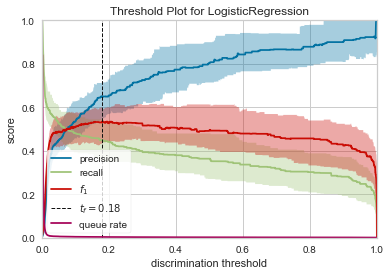

In [628]:
logit_preds = telecom_churn_prediction(logit, train_X, test_X, train_Y, test_Y,cols, "coefficients", threshold_plot=True)

In [437]:

predictions = logit.predict(scaled_test)

In [438]:
sub = pd.DataFrame()
sub['loan_id'] = test_loan_id
sub['m13'] = predictions

In [439]:
sub.to_csv(r'D:\ML\Hiring\submission1.csv', index=False)

In [1002]:
cols = [col for col in scaled_train_df.columns if col not in ['m13']]
target_col = ['m13']

In [1003]:
cols = [col for col in train.columns if col not in ['m13']]
from imblearn.over_sampling import SMOTE
smote_X = scaled_train_df.drop(columns=['m13'])
smote_Y = scaled_train_df['m13']
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)
os = SMOTE(random_state=0)
os_smote_train_X, os_train_smote_Y = os.fit_sample(smote_train_X, smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)


In [1004]:
#smote without train test split
from imblearn.over_sampling import SMOTE
train_os_x, train_os_y = os.fit_sample(train[cols], train['m13'])
train_osx = pd.DataFrame(data=train_os_x, columns=cols)
train_osy = pd.DataFrame(data=train_os_y, columns=target_col)

In [1005]:
#smote without train test split on scaled data
from imblearn.over_sampling import SMOTE
train_os_x, train_os_y = os.fit_sample(scaled_train_df[cols], scaled_train_df['m13'])
train_osx_scaled = pd.DataFrame(data=train_os_x, columns=cols)
train_osy_scaled = pd.DataFrame(data=train_os_y, columns=target_col)

In [1006]:
# Smote without scaling
smote_x = train.drop(columns=['m13'])
smote_y = train['m13']
smote_train_x,smote_test_x,smote_train_y,smote_test_y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)
os = SMOTE(random_state=0)
os_smote_train_x, os_smote_train_y = os.fit_sample(smote_train_x, smote_train_y)
os_smote_train_x = pd.DataFrame(data = os_smote_train_x,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_train_y,columns=target_col)
os_smote_test_x, os_smote_test_y = os.fit_sample(smote_test_x, smote_test_y)
os_smote_test_x = pd.DataFrame(data = os_smote_test_x,columns=cols)
os_smote_test_y = pd.DataFrame(data = os_smote_test_y,columns=target_col)

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

         0.0       0.75      0.92      0.83     28880
         1.0       0.90      0.70      0.79     28880

   micro avg       0.81      0.81      0.81     57760
   macro avg       0.83      0.81      0.81     57760
weighted avg       0.83      0.81      0.81     57760

Accuracy   Score :  0.810058864265928
Area under curve :  0.8100588642659279 



C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.




This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mo

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mo

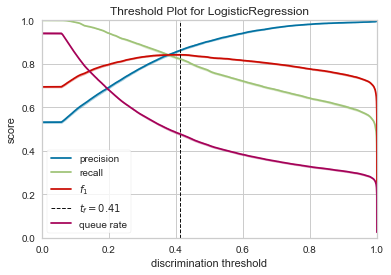

In [633]:
logit_smote = LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
                                penalty='l2', random_state=None, solver='liblinear', tol=0.001,
                                verbose=0, warm_start=False)
predictions1 = telecom_churn_prediction(logit_smote, os_smote_train_x, os_smote_test_x, os_smote_train_y, os_smote_test_y, cols, "coefficients", threshold_plot=True)

In [447]:
sub2 = pd.DataFrame()
sub2['loan_id'] = test_loan_id
sub2['m13'] = predictions1

In [448]:
sub2.to_csv(r'D:\ML\Hiring\predictions2.csv', index=False)

## Using KNN classifier

In [449]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
    return algorithm.predict(scaled_test)

In [450]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None,
                          n_jobs=-1, n_neighbors=5, p=2, weights='uniform')

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     23088
         1.0       0.24      0.84      0.37       124

   micro avg       0.98      0.98      0.98     23212
   macro avg       0.62      0.91      0.68     23212
weighted avg       1.00      0.98      0.99     23212

Accuracy Score   :  0.9846200241254524
Area under curve :  0.912056675161514


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\classifier\threshold.py:297: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\classifier\threshold.py:297: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\classifier\threshold.py:297: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\classifier\threshold.py:297: DataConversionWarning:

A column-vector y was 

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\classifier\threshold.py:297: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\classifier\threshold.py:297: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\classifier\threshold.py:297: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\classifier\threshold.py:297: DataConversionWarning:

A column-vector y was 

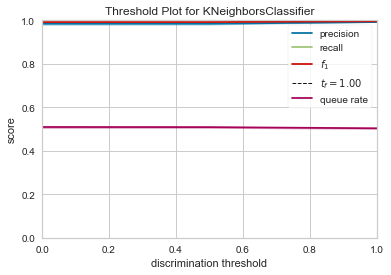

In [451]:
predictions2 = telecom_churn_prediction_alg(knn,os_smote_X, test_X, os_smote_Y, test_Y, threshold_plot=True)

In [452]:
sub3 = pd.DataFrame()
sub3['loan_id'] = test_loan_id
sub3['m13'] = predictions2
sub3.to_csv(r'D:\ML\Hiring\predictions.csv', index=False)

In [458]:
os_smote_Y['m13'].value_counts()

1.0    86571
0.0    86571
Name: m13, dtype: int64

In [459]:
scaled_test.head()

borrower_credit_score  co-borrower_credit_score  debt_to_income_ratio  insurance_percent  insurance_type  interest_rate  loan_term  loan_to_value   m1  m10  m11  m12   m2   m3   m4   m5   m6   m7   m8   m9  number_of_borrowers  unpaid_principal_bal  avg_source_bal  avg_source_term  avg_source_ltv  avg_source_d2i  avg_source_crscore  times_dq  average_crscore  interest_amt  total_outstanding  Anderson-Taylor  Browning-Hart  Chapman-Mcmahon  Cole, Brooks and Vincent  Edwards-Hoffman  Martinez, Duffy and Bird  Miller, Mcclure and Allen  Nicholson Group  OTHER  Richards-Walters  Richardson Ltd  Romero, Woods and Johnson  Sanchez, Hays and Wilkerson  Sanchez-Robinson  Suarez Inc  Swanson, Newton and Miller  Taylor, Hunt and Rodriguez  Thornton-Davis  Turner, Baldwin and Rhodes    X    Y    Z  A23  B12  C86
0               0.166667                 -0.938053               -0.6875                0.0             0.0            0.0        0.0       0.130435  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                 -1.0              1.477987             1.0              1.0             1.0             1.0                -1.0       0.0        -0.884810      1.572632           1.627219              0.0            1.0              0.0                       0.0              0.0                       0.0                        0.0              0.0    0.0               0.0             0.0                        0.0                          0.0               0.0         0.0                         0.0                         0.0             0.0                         0.0 -1.0  1.0  0.0  1.0  0.0  0.0
1               0.229167                  0.053097                0.1250                0.0             0.0            1.0        0.0       0.347826  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                  0.0             -0.433962             0.0              0.0             0.0             0.0                 0.0       0.0         0.111392     -0.085736          -0.165257              0.0            0.0              0.0                       0.0              0.0                       0.0                        0.0              0.0    1.0               0.0             0.0                        0.0                          0.0               0.0         0.0                         0.0                         0.0             0.0                         0.0  0.0  0.0  0.0  0.0  0.0  1.0
2              -1.500000                 -0.938053                0.1875                0.0             0.0            1.0        0.0       0.130435  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                 -1.0             -0.691824             1.0              1.0             1.0             1.0                -1.0       0.0        -0.986076     -0.362037          -0.451513              0.0            0.0              0.0                       0.0              0.0                       0.0                        0.0              0.0    1.0               0.0             0.0                        0.0                          0.0               0.0         0.0                         0.0                         0.0             0.0                         0.0 -1.0  1.0  0.0  0.0  0.0  1.0
3               0.333333                  0.089760               -0.4375                0.0             0.0            0.4       -1.0      -1.347826  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                  0.0             -0.371069             0.0              0.0             0.0             0.0                 0.0       0.0         0.154430     -0.467334          -0.475070              0.0            0.0              0.0                       0.0              0.0                       0.0                        1.0              0.0    0.0               0.0             0.0                        0.0                          0.0               0.0         0.0                         0.0                         0

In [461]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

SEED = 314159265
VALID_SIZE = 0.2
TARGET = 'outcome'

In [462]:
def intersect(l_1, l_2):
    return list(set(l_1) & set(l_2))

In [586]:
def score(params):
    print("Training with params: ")
    print(params)
    num_round = params['n_estimators']
    #del params['n_estimators']
    dtrain = xgb.DMatrix(os_smote_X, label=os_smote_Y)
    dvalid = xgb.DMatrix(test_X, label=test_Y)
    watchlist = [(dvalid,'eval'),(dtrain,'train')]
    gbm_model = xgb.train(params, dtrain, num_round,
                         evals=watchlist,
                         verbose_eval=True)
    predictions = gbm_model.predict(dvalid, ntree_limit=gbm_model.best_iteration+1)
    score = roc_auc_score(test_Y, predictions)
    print("\tScore {0}\n\n".format(score))
    preds = gbm_model.predict(xgb.DMatrix(scaled_test))
    return preds

In [517]:
def optimize(random_state=SEED):
    
    space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.05),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 10, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.1),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.1),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.1),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'nthread': 4,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': random_state
    }
    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=20)
    return best

In [492]:
best_hyperparams = optimize()

Training with params:                                                                                                  
{'booster': 'gbtree', 'colsample_bytree': 0.6000000000000001, 'eta': 0.25, 'eval_metric': 'auc', 'gamma': 0.8, 'max_depth': 3, 'min_child_weight': 4.0, 'n_estimators': 500.0, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 314159265, 'silent': 1, 'subsample': 1.0, 'tree_method': 'exact'}
[0]	eval-auc:0.847432	train-auc:0.902216                                                                               

[1]	eval-auc:0.876992	train-auc:0.935565                                                                               

[2]	eval-auc:0.884966	train-auc:0.94838                                                                                

[3]	eval-auc:0.890668	train-auc:0.952164                                                                               

[4]	eval-auc:0.892862	train-auc:0.952739                                                             

[131]	eval-auc:0.901323	train-auc:0.999094                                                                             

[132]	eval-auc:0.900958	train-auc:0.999095                                                                             

[133]	eval-auc:0.900405	train-auc:0.999099                                                                             

[134]	eval-auc:0.900429	train-auc:0.9991                                                                               

[135]	eval-auc:0.900145	train-auc:0.999118                                                                             

[136]	eval-auc:0.900255	train-auc:0.999152                                                                             

[137]	eval-auc:0.898297	train-auc:0.999153                                                                             

[138]	eval-auc:0.89863	train-auc:0.999164                                                                              

[139]	eval-auc:0.898465	train-au

[265]	eval-auc:0.914286	train-auc:0.999572                                                                             

[266]	eval-auc:0.914912	train-auc:0.999579                                                                             

[267]	eval-auc:0.914757	train-auc:0.999579                                                                             

[268]	eval-auc:0.916243	train-auc:0.999583                                                                             

[269]	eval-auc:0.916569	train-auc:0.999584                                                                             

[270]	eval-auc:0.916632	train-auc:0.999587                                                                             

[271]	eval-auc:0.917325	train-auc:0.99959                                                                              

[272]	eval-auc:0.918101	train-auc:0.999593                                                                             

[273]	eval-auc:0.918768	train-au

[399]	eval-auc:0.934473	train-auc:0.999733                                                                             

[400]	eval-auc:0.934729	train-auc:0.999734                                                                             

[401]	eval-auc:0.934914	train-auc:0.999735                                                                             

[402]	eval-auc:0.934984	train-auc:0.999735                                                                             

[403]	eval-auc:0.93517	train-auc:0.999737                                                                              

[404]	eval-auc:0.935494	train-auc:0.999737                                                                             

[405]	eval-auc:0.935821	train-auc:0.999742                                                                             

[406]	eval-auc:0.935802	train-auc:0.999742                                                                             

[407]	eval-auc:0.935682	train-au

[29]	eval-auc:0.912391	train-auc:0.996627                                                                              

[30]	eval-auc:0.91416	train-auc:0.99682                                                                                

[31]	eval-auc:0.914616	train-auc:0.996917                                                                              

[32]	eval-auc:0.915001	train-auc:0.996987                                                                              

[33]	eval-auc:0.91501	train-auc:0.997161                                                                               

[34]	eval-auc:0.914847	train-auc:0.997245                                                                              

[35]	eval-auc:0.915343	train-auc:0.997387                                                                              

[36]	eval-auc:0.915801	train-auc:0.997481                                                                              

[37]	eval-auc:0.915846	train-auc

[163]	eval-auc:0.934215	train-auc:0.999726                                                                             

[164]	eval-auc:0.934441	train-auc:0.999726                                                                             

[165]	eval-auc:0.934348	train-auc:0.999728                                                                             

[166]	eval-auc:0.934722	train-auc:0.999733                                                                             

[167]	eval-auc:0.935082	train-auc:0.999738                                                                             

[168]	eval-auc:0.934925	train-auc:0.99974                                                                              

[169]	eval-auc:0.934745	train-auc:0.999741                                                                             

[170]	eval-auc:0.93472	train-auc:0.999742                                                                              

[171]	eval-auc:0.934668	train-au

[297]	eval-auc:0.947853	train-auc:0.999885                                                                             

[298]	eval-auc:0.947835	train-auc:0.999885                                                                             

[299]	eval-auc:0.947798	train-auc:0.999885                                                                             

[300]	eval-auc:0.947765	train-auc:0.999885                                                                             

[301]	eval-auc:0.94791	train-auc:0.999885                                                                              

[302]	eval-auc:0.94797	train-auc:0.999885                                                                              

[303]	eval-auc:0.948244	train-auc:0.999887                                                                             

[304]	eval-auc:0.948509	train-auc:0.999889                                                                             

[305]	eval-auc:0.948579	train-au

[431]	eval-auc:0.95729	train-auc:0.999946                                                                              

[432]	eval-auc:0.957339	train-auc:0.999946                                                                             

[433]	eval-auc:0.957347	train-auc:0.999946                                                                             

[434]	eval-auc:0.957481	train-auc:0.999947                                                                             

[435]	eval-auc:0.957553	train-auc:0.999947                                                                             

[436]	eval-auc:0.957578	train-auc:0.999947                                                                             

[437]	eval-auc:0.957542	train-auc:0.999948                                                                             

[438]	eval-auc:0.95759	train-auc:0.999948                                                                              

[439]	eval-auc:0.957745	train-au

[61]	eval-auc:0.883153	train-auc:0.999059                                                                              

[62]	eval-auc:0.883829	train-auc:0.999064                                                                              

[63]	eval-auc:0.883829	train-auc:0.999092                                                                              

[64]	eval-auc:0.883158	train-auc:0.999139                                                                              

[65]	eval-auc:0.882814	train-auc:0.999156                                                                              

[66]	eval-auc:0.883458	train-auc:0.999166                                                                              

[67]	eval-auc:0.883109	train-auc:0.99917                                                                               

[68]	eval-auc:0.884468	train-auc:0.999164                                                                              

[69]	eval-auc:0.882434	train-auc

[195]	eval-auc:0.940277	train-auc:0.999775                                                                             

[196]	eval-auc:0.940637	train-auc:0.999776                                                                             

[197]	eval-auc:0.940725	train-auc:0.999778                                                                             

[198]	eval-auc:0.941753	train-auc:0.999781                                                                             

[199]	eval-auc:0.942498	train-auc:0.999785                                                                             

[200]	eval-auc:0.943425	train-auc:0.999789                                                                             

[201]	eval-auc:0.943908	train-auc:0.999792                                                                             

[202]	eval-auc:0.944197	train-auc:0.999795                                                                             

[203]	eval-auc:0.944318	train-au

[329]	eval-auc:0.95734	train-auc:0.999925                                                                              

[330]	eval-auc:0.957353	train-auc:0.999925                                                                             

[331]	eval-auc:0.95686	train-auc:0.999926                                                                              

[332]	eval-auc:0.957049	train-auc:0.999927                                                                             

[333]	eval-auc:0.956836	train-auc:0.999928                                                                             

[334]	eval-auc:0.956996	train-auc:0.999929                                                                             

[335]	eval-auc:0.957255	train-auc:0.999929                                                                             

[336]	eval-auc:0.957385	train-auc:0.99993                                                                              

[337]	eval-auc:0.957379	train-au

[463]	eval-auc:0.963351	train-auc:0.999955                                                                             

[464]	eval-auc:0.963221	train-auc:0.999956                                                                             

[465]	eval-auc:0.963237	train-auc:0.999957                                                                             

[466]	eval-auc:0.963416	train-auc:0.999958                                                                             

[467]	eval-auc:0.963431	train-auc:0.999958                                                                             

[468]	eval-auc:0.963431	train-auc:0.999958                                                                             

[469]	eval-auc:0.963431	train-auc:0.999958                                                                             

[470]	eval-auc:0.963431	train-auc:0.999958                                                                             

[471]	eval-auc:0.963431	train-au

[597]	eval-auc:0.96842	train-auc:0.999977                                                                              

[598]	eval-auc:0.96842	train-auc:0.999977                                                                              

[599]	eval-auc:0.96842	train-auc:0.999977                                                                              

[600]	eval-auc:0.96842	train-auc:0.999977                                                                              

[601]	eval-auc:0.968647	train-auc:0.999977                                                                             

[602]	eval-auc:0.968647	train-auc:0.999977                                                                             

[603]	eval-auc:0.968647	train-auc:0.999977                                                                             

[604]	eval-auc:0.968647	train-auc:0.999977                                                                             

[605]	eval-auc:0.968647	train-au

[731]	eval-auc:0.968852	train-auc:0.999978                                                                             

[732]	eval-auc:0.968852	train-auc:0.999978                                                                             

[733]	eval-auc:0.968852	train-auc:0.999978                                                                             

[734]	eval-auc:0.968852	train-auc:0.999978                                                                             

[735]	eval-auc:0.968852	train-auc:0.999978                                                                             

[736]	eval-auc:0.968852	train-auc:0.999978                                                                             

[737]	eval-auc:0.968852	train-auc:0.999978                                                                             

[738]	eval-auc:0.968852	train-auc:0.999978                                                                             

[739]	eval-auc:0.968852	train-au

[865]	eval-auc:0.968852	train-auc:0.999978                                                                             

[866]	eval-auc:0.968852	train-auc:0.999978                                                                             

[867]	eval-auc:0.968852	train-auc:0.999978                                                                             

[868]	eval-auc:0.968852	train-auc:0.999978                                                                             

[869]	eval-auc:0.968852	train-auc:0.999978                                                                             

[870]	eval-auc:0.968852	train-auc:0.999978                                                                             

[871]	eval-auc:0.968852	train-auc:0.999978                                                                             

[872]	eval-auc:0.968852	train-auc:0.999978                                                                             

[873]	eval-auc:0.968852	train-au

[95]	eval-auc:0.960298	train-auc:0.999951                                                                              

[96]	eval-auc:0.960624	train-auc:0.999953                                                                              

[97]	eval-auc:0.960698	train-auc:0.999954                                                                              

[98]	eval-auc:0.960479	train-auc:0.999956                                                                              

[99]	eval-auc:0.960687	train-auc:0.999957                                                                              

[100]	eval-auc:0.960537	train-auc:0.999958                                                                             

[101]	eval-auc:0.960923	train-auc:0.99996                                                                              

[102]	eval-auc:0.960714	train-auc:0.999961                                                                             

[103]	eval-auc:0.961117	train-au

[229]	eval-auc:0.96788	train-auc:1                                                                                     

[230]	eval-auc:0.96766	train-auc:1                                                                                     

[231]	eval-auc:0.967735	train-auc:1                                                                                    

[232]	eval-auc:0.967595	train-auc:1                                                                                    

[233]	eval-auc:0.96767	train-auc:1                                                                                     

[234]	eval-auc:0.96776	train-auc:1                                                                                     

[235]	eval-auc:0.968426	train-auc:1                                                                                    

[236]	eval-auc:0.968276	train-auc:1                                                                                    

[237]	eval-auc:0.968134	train-au

[363]	eval-auc:0.96744	train-auc:1                                                                                     

[364]	eval-auc:0.967392	train-auc:1                                                                                    

[365]	eval-auc:0.967392	train-auc:1                                                                                    

[366]	eval-auc:0.967423	train-auc:1                                                                                    

[367]	eval-auc:0.96731	train-auc:1                                                                                     

[368]	eval-auc:0.967249	train-auc:1                                                                                    

[369]	eval-auc:0.967228	train-auc:1                                                                                    

[370]	eval-auc:0.967236	train-auc:1                                                                                    

[371]	eval-auc:0.967232	train-au

[497]	eval-auc:0.966124	train-auc:1                                                                                    

[498]	eval-auc:0.966194	train-auc:1                                                                                    

[499]	eval-auc:0.966058	train-auc:1                                                                                    

[500]	eval-auc:0.966171	train-auc:1                                                                                    

[501]	eval-auc:0.966171	train-auc:1                                                                                    

[502]	eval-auc:0.966173	train-auc:1                                                                                    

[503]	eval-auc:0.966345	train-auc:1                                                                                    

[504]	eval-auc:0.966345	train-auc:1                                                                                    

[505]	eval-auc:0.966421	train-au

[631]	eval-auc:0.966272	train-auc:1                                                                                    

[632]	eval-auc:0.966272	train-auc:1                                                                                    

[633]	eval-auc:0.966227	train-auc:1                                                                                    

[634]	eval-auc:0.966196	train-auc:1                                                                                    

[635]	eval-auc:0.966134	train-auc:1                                                                                    

[636]	eval-auc:0.966134	train-auc:1                                                                                    

[637]	eval-auc:0.966134	train-auc:1                                                                                    

[638]	eval-auc:0.966134	train-auc:1                                                                                    

[639]	eval-auc:0.966134	train-au

[765]	eval-auc:0.965611	train-auc:1                                                                                    

[766]	eval-auc:0.965611	train-auc:1                                                                                    

[767]	eval-auc:0.96562	train-auc:1                                                                                     

[768]	eval-auc:0.965695	train-auc:1                                                                                    

[769]	eval-auc:0.965695	train-auc:1                                                                                    

[770]	eval-auc:0.965795	train-auc:1                                                                                    

[771]	eval-auc:0.965795	train-auc:1                                                                                    

[772]	eval-auc:0.965795	train-auc:1                                                                                    

[773]	eval-auc:0.965795	train-au

[95]	eval-auc:0.890153	train-auc:0.987911                                                                              

[96]	eval-auc:0.890453	train-auc:0.98803                                                                               

[97]	eval-auc:0.890603	train-auc:0.988307                                                                              

[98]	eval-auc:0.890655	train-auc:0.988409                                                                              

[99]	eval-auc:0.890533	train-auc:0.988648                                                                              

	Score 0.8905326115507566                                                                                              


Training with params:                                                                                                  
{'booster': 'gbtree', 'colsample_bytree': 0.5, 'eta': 0.05, 'eval_metric': 'auc', 'gamma': 0.9, 'max_depth': 1, 'min_child_weight': 6.0, 'n_estimators': 

[125]	eval-auc:0.890642	train-auc:0.940138                                                                             

[126]	eval-auc:0.890434	train-auc:0.940401                                                                             

[127]	eval-auc:0.890641	train-auc:0.94044                                                                              

[128]	eval-auc:0.890642	train-auc:0.940552                                                                             

[129]	eval-auc:0.890588	train-auc:0.940776                                                                             

[130]	eval-auc:0.890172	train-auc:0.94131                                                                              

[131]	eval-auc:0.890188	train-auc:0.941348                                                                             

[132]	eval-auc:0.88999	train-auc:0.941518                                                                              

[133]	eval-auc:0.890001	train-au

[259]	eval-auc:0.888246	train-auc:0.960343                                                                             

[260]	eval-auc:0.888058	train-auc:0.960617                                                                             

[261]	eval-auc:0.887553	train-auc:0.960807                                                                             

[262]	eval-auc:0.887483	train-auc:0.960835                                                                             

[263]	eval-auc:0.887182	train-auc:0.960828                                                                             

[264]	eval-auc:0.88691	train-auc:0.96092                                                                               

[265]	eval-auc:0.887054	train-auc:0.961126                                                                             

[266]	eval-auc:0.887272	train-auc:0.96109                                                                              

[267]	eval-auc:0.887486	train-au

[393]	eval-auc:0.888931	train-auc:0.970666                                                                             

[394]	eval-auc:0.88893	train-auc:0.970656                                                                              

[395]	eval-auc:0.888945	train-auc:0.970658                                                                             

[396]	eval-auc:0.888951	train-auc:0.970772                                                                             

[397]	eval-auc:0.888941	train-auc:0.970789                                                                             

[398]	eval-auc:0.888976	train-auc:0.970777                                                                             

[399]	eval-auc:0.88894	train-auc:0.970892                                                                              

[400]	eval-auc:0.88883	train-auc:0.970875                                                                              

[401]	eval-auc:0.888851	train-au

[23]	eval-auc:0.887201	train-auc:0.923773                                                                              

[24]	eval-auc:0.886608	train-auc:0.925008                                                                              

[25]	eval-auc:0.886733	train-auc:0.925111                                                                              

[26]	eval-auc:0.886731	train-auc:0.925626                                                                              

[27]	eval-auc:0.88833	train-auc:0.926565                                                                               

[28]	eval-auc:0.888409	train-auc:0.926626                                                                              

[29]	eval-auc:0.890365	train-auc:0.928415                                                                              

[30]	eval-auc:0.891476	train-auc:0.930996                                                                              

[31]	eval-auc:0.891533	train-auc

[157]	eval-auc:0.886971	train-auc:0.966112                                                                             

[158]	eval-auc:0.886909	train-auc:0.966395                                                                             

[159]	eval-auc:0.886267	train-auc:0.96634                                                                              

[160]	eval-auc:0.88667	train-auc:0.966226                                                                              

[161]	eval-auc:0.886305	train-auc:0.966674                                                                             

[162]	eval-auc:0.886615	train-auc:0.967076                                                                             

[163]	eval-auc:0.886954	train-auc:0.966966                                                                             

[164]	eval-auc:0.886637	train-auc:0.967394                                                                             

[165]	eval-auc:0.887089	train-au

[291]	eval-auc:0.889374	train-auc:0.97747                                                                              

[292]	eval-auc:0.889708	train-auc:0.977538                                                                             

[293]	eval-auc:0.889683	train-auc:0.977656                                                                             

[294]	eval-auc:0.889718	train-auc:0.977625                                                                             

[295]	eval-auc:0.889674	train-auc:0.977738                                                                             

[296]	eval-auc:0.889718	train-auc:0.977701                                                                             

[297]	eval-auc:0.890004	train-auc:0.977742                                                                             

[298]	eval-auc:0.890035	train-auc:0.977851                                                                             

[299]	eval-auc:0.89025	train-auc

[425]	eval-auc:0.890754	train-auc:0.982185                                                                             

[426]	eval-auc:0.890932	train-auc:0.982214                                                                             

[427]	eval-auc:0.89066	train-auc:0.982194                                                                              

[428]	eval-auc:0.890624	train-auc:0.982257                                                                             

[429]	eval-auc:0.890696	train-auc:0.982346                                                                             

[430]	eval-auc:0.890522	train-auc:0.982407                                                                             

[431]	eval-auc:0.890743	train-auc:0.982353                                                                             

[432]	eval-auc:0.890593	train-auc:0.982352                                                                             

[433]	eval-auc:0.890526	train-au

[559]	eval-auc:0.889582	train-auc:0.985351                                                                             

[560]	eval-auc:0.889602	train-auc:0.98546                                                                              

[561]	eval-auc:0.889535	train-auc:0.985508                                                                             

[562]	eval-auc:0.889343	train-auc:0.985547                                                                             

[563]	eval-auc:0.889382	train-auc:0.985599                                                                             

[564]	eval-auc:0.889122	train-auc:0.98559                                                                              

[565]	eval-auc:0.888994	train-auc:0.985612                                                                             

[566]	eval-auc:0.88896	train-auc:0.985669                                                                              

[567]	eval-auc:0.888864	train-au

[693]	eval-auc:0.888307	train-auc:0.987475                                                                             

[694]	eval-auc:0.888204	train-auc:0.987514                                                                             

[695]	eval-auc:0.888403	train-auc:0.987471                                                                             

[696]	eval-auc:0.88846	train-auc:0.987453                                                                              

[697]	eval-auc:0.888479	train-auc:0.987448                                                                             

[698]	eval-auc:0.888478	train-auc:0.987471                                                                             

[699]	eval-auc:0.88842	train-auc:0.987507                                                                              

[700]	eval-auc:0.888458	train-auc:0.98752                                                                              

[701]	eval-auc:0.888076	train-au

[23]	eval-auc:0.895566	train-auc:0.989469                                                                              

[24]	eval-auc:0.896342	train-auc:0.989813                                                                              

[25]	eval-auc:0.895712	train-auc:0.990294                                                                              

[26]	eval-auc:0.897516	train-auc:0.990571                                                                              

[27]	eval-auc:0.896923	train-auc:0.991155                                                                              

[28]	eval-auc:0.896269	train-auc:0.991482                                                                              

[29]	eval-auc:0.896173	train-auc:0.991629                                                                              

[30]	eval-auc:0.895958	train-auc:0.991941                                                                              

[31]	eval-auc:0.896122	train-auc

[157]	eval-auc:0.89553	train-auc:0.999366                                                                              

[158]	eval-auc:0.894146	train-auc:0.999366                                                                             

[159]	eval-auc:0.894467	train-auc:0.99937                                                                              

[160]	eval-auc:0.894829	train-auc:0.999375                                                                             

[161]	eval-auc:0.894569	train-auc:0.999376                                                                             

[162]	eval-auc:0.895029	train-auc:0.999385                                                                             

[163]	eval-auc:0.894212	train-auc:0.999391                                                                             

[164]	eval-auc:0.894952	train-auc:0.9994                                                                               

[165]	eval-auc:0.89536	train-auc

[291]	eval-auc:0.924577	train-auc:0.999676                                                                             

[292]	eval-auc:0.926005	train-auc:0.999679                                                                             

[293]	eval-auc:0.926026	train-auc:0.999679                                                                             

[294]	eval-auc:0.926076	train-auc:0.99968                                                                              

[295]	eval-auc:0.926477	train-auc:0.99968                                                                              

[296]	eval-auc:0.92734	train-auc:0.999682                                                                              

[297]	eval-auc:0.927454	train-auc:0.999683                                                                             

[298]	eval-auc:0.927873	train-auc:0.999684                                                                             

[299]	eval-auc:0.928121	train-au

[425]	eval-auc:0.944626	train-auc:0.999805                                                                             

[426]	eval-auc:0.94505	train-auc:0.999806                                                                              

[427]	eval-auc:0.944815	train-auc:0.999808                                                                             

[428]	eval-auc:0.945151	train-auc:0.999809                                                                             

[429]	eval-auc:0.944963	train-auc:0.999809                                                                             

[430]	eval-auc:0.944769	train-auc:0.99981                                                                              

[431]	eval-auc:0.944934	train-auc:0.999811                                                                             

[432]	eval-auc:0.944998	train-auc:0.999811                                                                             

[433]	eval-auc:0.944965	train-au

[559]	eval-auc:0.954022	train-auc:0.999891                                                                             

[560]	eval-auc:0.95392	train-auc:0.999891                                                                              

[561]	eval-auc:0.953881	train-auc:0.999891                                                                             

[562]	eval-auc:0.954161	train-auc:0.999892                                                                             

[563]	eval-auc:0.954049	train-auc:0.999892                                                                             

[564]	eval-auc:0.954403	train-auc:0.999893                                                                             

[565]	eval-auc:0.953946	train-auc:0.999894                                                                             

[566]	eval-auc:0.954042	train-auc:0.999894                                                                             

[567]	eval-auc:0.954141	train-au

[89]	eval-auc:0.891064	train-auc:0.969197                                                                              

[90]	eval-auc:0.889988	train-auc:0.969405                                                                              

[91]	eval-auc:0.890947	train-auc:0.969519                                                                              

[92]	eval-auc:0.89036	train-auc:0.970221                                                                               

[93]	eval-auc:0.890974	train-auc:0.969982                                                                              

[94]	eval-auc:0.890905	train-auc:0.97047                                                                               

[95]	eval-auc:0.890981	train-auc:0.970451                                                                              

[96]	eval-auc:0.890258	train-auc:0.970461                                                                              

[97]	eval-auc:0.890335	train-auc

[223]	eval-auc:0.891141	train-auc:0.983063                                                                             

[224]	eval-auc:0.891785	train-auc:0.983086                                                                             

[225]	eval-auc:0.891082	train-auc:0.983117                                                                             

[226]	eval-auc:0.891248	train-auc:0.983257                                                                             

[227]	eval-auc:0.890628	train-auc:0.98324                                                                              

[228]	eval-auc:0.891064	train-auc:0.983133                                                                             

[229]	eval-auc:0.890867	train-auc:0.98324                                                                              

[230]	eval-auc:0.890762	train-auc:0.983394                                                                             

[231]	eval-auc:0.890839	train-au

[357]	eval-auc:0.888794	train-auc:0.987963                                                                             

[358]	eval-auc:0.888929	train-auc:0.98802                                                                              

[359]	eval-auc:0.888805	train-auc:0.988115                                                                             

[360]	eval-auc:0.888854	train-auc:0.988038                                                                             

[361]	eval-auc:0.888859	train-auc:0.988064                                                                             

[362]	eval-auc:0.888595	train-auc:0.988166                                                                             

[363]	eval-auc:0.888591	train-auc:0.988208                                                                             

[364]	eval-auc:0.888735	train-auc:0.988201                                                                             

[365]	eval-auc:0.88901	train-auc

[491]	eval-auc:0.886658	train-auc:0.990652                                                                             

[492]	eval-auc:0.886487	train-auc:0.990652                                                                             

[493]	eval-auc:0.886341	train-auc:0.990706                                                                             

[494]	eval-auc:0.886719	train-auc:0.990708                                                                             

[495]	eval-auc:0.886493	train-auc:0.990763                                                                             

[496]	eval-auc:0.88655	train-auc:0.990761                                                                              

[497]	eval-auc:0.886364	train-auc:0.990767                                                                             

[498]	eval-auc:0.886268	train-auc:0.990781                                                                             

[499]	eval-auc:0.8863	train-auc:

[21]	eval-auc:0.913027	train-auc:0.998107                                                                              

[22]	eval-auc:0.913043	train-auc:0.998179                                                                              

[23]	eval-auc:0.914384	train-auc:0.9983                                                                                

[24]	eval-auc:0.913561	train-auc:0.998347                                                                              

[25]	eval-auc:0.915558	train-auc:0.998499                                                                              

[26]	eval-auc:0.915837	train-auc:0.998565                                                                              

[27]	eval-auc:0.914783	train-auc:0.998632                                                                              

[28]	eval-auc:0.916204	train-auc:0.998665                                                                              

[29]	eval-auc:0.915961	train-auc

[155]	eval-auc:0.957044	train-auc:0.999942                                                                             

[156]	eval-auc:0.95736	train-auc:0.999943                                                                              

[157]	eval-auc:0.957539	train-auc:0.999943                                                                             

[158]	eval-auc:0.95808	train-auc:0.999945                                                                              

[159]	eval-auc:0.958285	train-auc:0.999945                                                                             

[160]	eval-auc:0.958618	train-auc:0.999947                                                                             

[161]	eval-auc:0.958874	train-auc:0.999949                                                                             

[162]	eval-auc:0.959018	train-auc:0.99995                                                                              

[163]	eval-auc:0.95993	train-auc

[289]	eval-auc:0.969992	train-auc:0.999999                                                                             

[290]	eval-auc:0.969997	train-auc:0.999999                                                                             

[291]	eval-auc:0.969978	train-auc:0.999999                                                                             

[292]	eval-auc:0.970019	train-auc:0.999999                                                                             

[293]	eval-auc:0.969948	train-auc:0.999999                                                                             

[294]	eval-auc:0.970052	train-auc:0.999999                                                                             

[295]	eval-auc:0.9701	train-auc:0.999999                                                                               

[296]	eval-auc:0.970057	train-auc:0.999999                                                                             

[297]	eval-auc:0.969982	train-au

[19]	eval-auc:0.903061	train-auc:0.997695                                                                              

[20]	eval-auc:0.9032	train-auc:0.997771                                                                                

[21]	eval-auc:0.901996	train-auc:0.997882                                                                              

[22]	eval-auc:0.902549	train-auc:0.997942                                                                              

[23]	eval-auc:0.902671	train-auc:0.998176                                                                              

[24]	eval-auc:0.903982	train-auc:0.998228                                                                              

[25]	eval-auc:0.903363	train-auc:0.99831                                                                               

[26]	eval-auc:0.902885	train-auc:0.998392                                                                              

[27]	eval-auc:0.904362	train-auc

[153]	eval-auc:0.953467	train-auc:0.999913                                                                             

[154]	eval-auc:0.953583	train-auc:0.999915                                                                             

[155]	eval-auc:0.954126	train-auc:0.999917                                                                             

[156]	eval-auc:0.954136	train-auc:0.999917                                                                             

[157]	eval-auc:0.95391	train-auc:0.999917                                                                              

[158]	eval-auc:0.954259	train-auc:0.999919                                                                             

[159]	eval-auc:0.954178	train-auc:0.999918                                                                             

[160]	eval-auc:0.9536	train-auc:0.999918                                                                               

[161]	eval-auc:0.953624	train-au

[287]	eval-auc:0.960278	train-auc:0.999993                                                                             

[288]	eval-auc:0.960245	train-auc:0.999993                                                                             

[289]	eval-auc:0.960895	train-auc:0.999993                                                                             

[290]	eval-auc:0.960857	train-auc:0.999993                                                                             

[291]	eval-auc:0.960865	train-auc:0.999993                                                                             

[292]	eval-auc:0.96067	train-auc:0.999994                                                                              

[293]	eval-auc:0.960575	train-auc:0.999994                                                                             

[294]	eval-auc:0.960862	train-auc:0.999994                                                                             

[295]	eval-auc:0.961332	train-au

[421]	eval-auc:0.961534	train-auc:1                                                                                    

[422]	eval-auc:0.96139	train-auc:1                                                                                     

[423]	eval-auc:0.961494	train-auc:1                                                                                    

[424]	eval-auc:0.961134	train-auc:1                                                                                    

[425]	eval-auc:0.961196	train-auc:1                                                                                    

[426]	eval-auc:0.961252	train-auc:1                                                                                    

[427]	eval-auc:0.961394	train-auc:1                                                                                    

[428]	eval-auc:0.961514	train-auc:1                                                                                    

[429]	eval-auc:0.96149	train-auc

[51]	eval-auc:0.936169	train-auc:0.999569                                                                              

[52]	eval-auc:0.936894	train-auc:0.999579                                                                              

[53]	eval-auc:0.937131	train-auc:0.999594                                                                              

[54]	eval-auc:0.93843	train-auc:0.999613                                                                               

[55]	eval-auc:0.938308	train-auc:0.999623                                                                              

[56]	eval-auc:0.938205	train-auc:0.999628                                                                              

[57]	eval-auc:0.937761	train-auc:0.999631                                                                              

[58]	eval-auc:0.937462	train-auc:0.999642                                                                              

[59]	eval-auc:0.937751	train-auc

[185]	eval-auc:0.957439	train-auc:0.99994                                                                              

[186]	eval-auc:0.957535	train-auc:0.999941                                                                             

[187]	eval-auc:0.957647	train-auc:0.999942                                                                             

[188]	eval-auc:0.957671	train-auc:0.999942                                                                             

[189]	eval-auc:0.957761	train-auc:0.999942                                                                             

[190]	eval-auc:0.958047	train-auc:0.999943                                                                             

[191]	eval-auc:0.958342	train-auc:0.999944                                                                             

[192]	eval-auc:0.958109	train-auc:0.999945                                                                             

[193]	eval-auc:0.95815	train-auc

[15]	eval-auc:0.906991	train-auc:0.995143                                                                              

[16]	eval-auc:0.906752	train-auc:0.995417                                                                              

[17]	eval-auc:0.908091	train-auc:0.995516                                                                              

[18]	eval-auc:0.909593	train-auc:0.995727                                                                              

[19]	eval-auc:0.910204	train-auc:0.995944                                                                              

[20]	eval-auc:0.911407	train-auc:0.99609                                                                               

[21]	eval-auc:0.911241	train-auc:0.99621                                                                               

[22]	eval-auc:0.910113	train-auc:0.996321                                                                              

[23]	eval-auc:0.910854	train-auc

[149]	eval-auc:0.934275	train-auc:0.999793                                                                             

[150]	eval-auc:0.934306	train-auc:0.999793                                                                             

[151]	eval-auc:0.934561	train-auc:0.999797                                                                             

[152]	eval-auc:0.934751	train-auc:0.999798                                                                             

[153]	eval-auc:0.935452	train-auc:0.999801                                                                             

[154]	eval-auc:0.935393	train-auc:0.999802                                                                             

[155]	eval-auc:0.935737	train-auc:0.999804                                                                             

[156]	eval-auc:0.936303	train-auc:0.999806                                                                             

[157]	eval-auc:0.936246	train-au

[283]	eval-auc:0.959477	train-auc:0.999952                                                                             

[284]	eval-auc:0.959486	train-auc:0.999953                                                                             

[285]	eval-auc:0.959527	train-auc:0.999954                                                                             

[286]	eval-auc:0.959562	train-auc:0.999954                                                                             

[287]	eval-auc:0.95988	train-auc:0.999955                                                                              

[288]	eval-auc:0.959934	train-auc:0.999956                                                                             

[289]	eval-auc:0.960142	train-auc:0.999957                                                                             

[290]	eval-auc:0.960655	train-auc:0.999958                                                                             

[291]	eval-auc:0.960789	train-au

[417]	eval-auc:0.965719	train-auc:0.999994                                                                             

[418]	eval-auc:0.965739	train-auc:0.999994                                                                             

[419]	eval-auc:0.965841	train-auc:0.999994                                                                             

[420]	eval-auc:0.965914	train-auc:0.999994                                                                             

[421]	eval-auc:0.965906	train-auc:0.999994                                                                             

[422]	eval-auc:0.96588	train-auc:0.999994                                                                              

[423]	eval-auc:0.965965	train-auc:0.999995                                                                             

[424]	eval-auc:0.966013	train-auc:0.999995                                                                             

[425]	eval-auc:0.966068	train-au

[551]	eval-auc:0.968612	train-auc:0.999999                                                                             

[552]	eval-auc:0.968776	train-auc:0.999999                                                                             

[553]	eval-auc:0.968798	train-auc:0.999999                                                                             

[554]	eval-auc:0.968892	train-auc:0.999999                                                                             

[555]	eval-auc:0.968597	train-auc:0.999999                                                                             

[556]	eval-auc:0.968575	train-auc:0.999999                                                                             

[557]	eval-auc:0.968647	train-auc:0.999999                                                                             

[558]	eval-auc:0.968679	train-auc:0.999999                                                                             

[559]	eval-auc:0.968745	train-au

[81]	eval-auc:0.92125	train-auc:0.999714                                                                               

[82]	eval-auc:0.922399	train-auc:0.999724                                                                              

[83]	eval-auc:0.923254	train-auc:0.999731                                                                              

[84]	eval-auc:0.924406	train-auc:0.99974                                                                               

[85]	eval-auc:0.924916	train-auc:0.999747                                                                              

[86]	eval-auc:0.925667	train-auc:0.999747                                                                              

[87]	eval-auc:0.926909	train-auc:0.999755                                                                              

[88]	eval-auc:0.927779	train-auc:0.999759                                                                              

[89]	eval-auc:0.928003	train-auc

[215]	eval-auc:0.959797	train-auc:0.999974                                                                             

[216]	eval-auc:0.959754	train-auc:0.999975                                                                             

[217]	eval-auc:0.960174	train-auc:0.999975                                                                             

[218]	eval-auc:0.960142	train-auc:0.999976                                                                             

[219]	eval-auc:0.960344	train-auc:0.999976                                                                             

[220]	eval-auc:0.960195	train-auc:0.999977                                                                             

[221]	eval-auc:0.960118	train-auc:0.999977                                                                             

[222]	eval-auc:0.960144	train-auc:0.999977                                                                             

[223]	eval-auc:0.959927	train-au

[349]	eval-auc:0.964263	train-auc:0.999999                                                                             

[350]	eval-auc:0.964114	train-auc:0.999999                                                                             

[351]	eval-auc:0.964107	train-auc:0.999999                                                                             

[352]	eval-auc:0.963952	train-auc:0.999999                                                                             

[353]	eval-auc:0.963727	train-auc:0.999999                                                                             

[354]	eval-auc:0.963524	train-auc:0.999999                                                                             

[355]	eval-auc:0.96377	train-auc:0.999999                                                                              

[356]	eval-auc:0.963772	train-auc:0.999999                                                                             

[357]	eval-auc:0.963548	train-au

[483]	eval-auc:0.962087	train-auc:1                                                                                    

[484]	eval-auc:0.961969	train-auc:1                                                                                    

[485]	eval-auc:0.961936	train-auc:1                                                                                    

[486]	eval-auc:0.961958	train-auc:1                                                                                    

[487]	eval-auc:0.9619	train-auc:1                                                                                      

[488]	eval-auc:0.961743	train-auc:1                                                                                    

[489]	eval-auc:0.961743	train-auc:1                                                                                    

[490]	eval-auc:0.961743	train-auc:1                                                                                    

[491]	eval-auc:0.961928	train-au

[617]	eval-auc:0.963681	train-auc:1                                                                                    

[618]	eval-auc:0.963742	train-auc:1                                                                                    

[619]	eval-auc:0.963742	train-auc:1                                                                                    

[620]	eval-auc:0.963735	train-auc:1                                                                                    

[621]	eval-auc:0.963635	train-auc:1                                                                                    

[622]	eval-auc:0.963459	train-auc:1                                                                                    

[623]	eval-auc:0.963477	train-auc:1                                                                                    

[624]	eval-auc:0.963466	train-auc:1                                                                                    

[625]	eval-auc:0.963466	train-au

[47]	eval-auc:0.954299	train-auc:0.999927                                                                              

[48]	eval-auc:0.955122	train-auc:0.999928                                                                              

[49]	eval-auc:0.956884	train-auc:0.999934                                                                              

[50]	eval-auc:0.957745	train-auc:0.999936                                                                              

[51]	eval-auc:0.958609	train-auc:0.999937                                                                              

[52]	eval-auc:0.959311	train-auc:0.999942                                                                              

[53]	eval-auc:0.959421	train-auc:0.999945                                                                              

[54]	eval-auc:0.958664	train-auc:0.999947                                                                              

[55]	eval-auc:0.958631	train-auc

[181]	eval-auc:0.966181	train-auc:1                                                                                    

[182]	eval-auc:0.966703	train-auc:1                                                                                    

[183]	eval-auc:0.96675	train-auc:1                                                                                     

[184]	eval-auc:0.966807	train-auc:1                                                                                    

[185]	eval-auc:0.966772	train-auc:1                                                                                    

[186]	eval-auc:0.966258	train-auc:1                                                                                    

[187]	eval-auc:0.966156	train-auc:1                                                                                    

[188]	eval-auc:0.966401	train-auc:1                                                                                    

[189]	eval-auc:0.966386	train-au

[315]	eval-auc:0.966593	train-auc:1                                                                                    

[316]	eval-auc:0.966731	train-auc:1                                                                                    

[317]	eval-auc:0.966708	train-auc:1                                                                                    

[318]	eval-auc:0.966856	train-auc:1                                                                                    

[319]	eval-auc:0.966802	train-auc:1                                                                                    

[320]	eval-auc:0.966887	train-auc:1                                                                                    

[321]	eval-auc:0.967057	train-auc:1                                                                                    

[322]	eval-auc:0.967144	train-auc:1                                                                                    

[323]	eval-auc:0.967114	train-au

[449]	eval-auc:0.966523	train-auc:1                                                                                    

[450]	eval-auc:0.966523	train-auc:1                                                                                    

[451]	eval-auc:0.966578	train-auc:1                                                                                    

[452]	eval-auc:0.966578	train-auc:1                                                                                    

[453]	eval-auc:0.966726	train-auc:1                                                                                    

[454]	eval-auc:0.966767	train-auc:1                                                                                    

[455]	eval-auc:0.966907	train-auc:1                                                                                    

[456]	eval-auc:0.966957	train-auc:1                                                                                    

[457]	eval-auc:0.966957	train-au

[583]	eval-auc:0.966857	train-auc:1                                                                                    

[584]	eval-auc:0.966857	train-auc:1                                                                                    

[585]	eval-auc:0.966857	train-auc:1                                                                                    

[586]	eval-auc:0.966857	train-auc:1                                                                                    

[587]	eval-auc:0.966932	train-auc:1                                                                                    

[588]	eval-auc:0.966932	train-auc:1                                                                                    

[589]	eval-auc:0.966932	train-auc:1                                                                                    

[590]	eval-auc:0.966932	train-auc:1                                                                                    

[591]	eval-auc:0.966932	train-au

[113]	eval-auc:0.889813	train-auc:0.982241                                                                             

[114]	eval-auc:0.889816	train-auc:0.982005                                                                             

[115]	eval-auc:0.890568	train-auc:0.982117                                                                             

[116]	eval-auc:0.889507	train-auc:0.982365                                                                             

[117]	eval-auc:0.889375	train-auc:0.982918                                                                             

[118]	eval-auc:0.889507	train-auc:0.982671                                                                             

[119]	eval-auc:0.888972	train-auc:0.982757                                                                             

[120]	eval-auc:0.888852	train-auc:0.983317                                                                             

[121]	eval-auc:0.889616	train-au

[247]	eval-auc:0.887881	train-auc:0.989756                                                                             

[248]	eval-auc:0.888102	train-auc:0.989836                                                                             

[249]	eval-auc:0.887766	train-auc:0.989943                                                                             

[250]	eval-auc:0.887464	train-auc:0.989949                                                                             

[251]	eval-auc:0.887528	train-auc:0.990091                                                                             

[252]	eval-auc:0.88737	train-auc:0.990122                                                                              

[253]	eval-auc:0.88688	train-auc:0.990158                                                                              

[254]	eval-auc:0.887043	train-auc:0.990157                                                                             

[255]	eval-auc:0.886711	train-au

[381]	eval-auc:0.884483	train-auc:0.993334                                                                             

[382]	eval-auc:0.884371	train-auc:0.993358                                                                             

[383]	eval-auc:0.88451	train-auc:0.993289                                                                              

[384]	eval-auc:0.884379	train-auc:0.993376                                                                             

[385]	eval-auc:0.883594	train-auc:0.993371                                                                             

[386]	eval-auc:0.883418	train-auc:0.993431                                                                             

[387]	eval-auc:0.883593	train-auc:0.993384                                                                             

[388]	eval-auc:0.883954	train-auc:0.993397                                                                             

[389]	eval-auc:0.884259	train-au

[515]	eval-auc:0.884749	train-auc:0.995183                                                                             

[516]	eval-auc:0.884892	train-auc:0.995175                                                                             

[517]	eval-auc:0.884807	train-auc:0.995216                                                                             

[518]	eval-auc:0.884887	train-auc:0.995191                                                                             

[519]	eval-auc:0.88473	train-auc:0.99522                                                                               

[520]	eval-auc:0.884602	train-auc:0.995231                                                                             

[521]	eval-auc:0.884374	train-auc:0.995289                                                                             

[522]	eval-auc:0.884507	train-auc:0.99528                                                                              

[523]	eval-auc:0.884411	train-au

[649]	eval-auc:0.884005	train-auc:0.996256                                                                             

[650]	eval-auc:0.884026	train-auc:0.996248                                                                             

[651]	eval-auc:0.884091	train-auc:0.996241                                                                             

[652]	eval-auc:0.884032	train-auc:0.996277                                                                             

[653]	eval-auc:0.883944	train-auc:0.996284                                                                             

[654]	eval-auc:0.884092	train-auc:0.996247                                                                             

[655]	eval-auc:0.88407	train-auc:0.996248                                                                              

[656]	eval-auc:0.883651	train-auc:0.996292                                                                             

[657]	eval-auc:0.88353	train-auc

[783]	eval-auc:0.883515	train-auc:0.99693                                                                              

[784]	eval-auc:0.883674	train-auc:0.996918                                                                             

[785]	eval-auc:0.883441	train-auc:0.996935                                                                             

[786]	eval-auc:0.88288	train-auc:0.996943                                                                              

[787]	eval-auc:0.883071	train-auc:0.996911                                                                             

[788]	eval-auc:0.883317	train-auc:0.996883                                                                             

[789]	eval-auc:0.883273	train-auc:0.996905                                                                             

[790]	eval-auc:0.883334	train-auc:0.996899                                                                             

[791]	eval-auc:0.883254	train-au

[113]	eval-auc:0.888496	train-auc:0.998872                                                                             

[114]	eval-auc:0.88865	train-auc:0.998898                                                                              

[115]	eval-auc:0.889058	train-auc:0.998927                                                                             

[116]	eval-auc:0.889346	train-auc:0.998923                                                                             

[117]	eval-auc:0.890141	train-auc:0.998944                                                                             

[118]	eval-auc:0.890606	train-auc:0.99896                                                                              

[119]	eval-auc:0.890872	train-auc:0.998973                                                                             

[120]	eval-auc:0.891628	train-auc:0.998973                                                                             

[121]	eval-auc:0.891453	train-au

[247]	eval-auc:0.906285	train-auc:0.999445                                                                             

[248]	eval-auc:0.908081	train-auc:0.99945                                                                              

[249]	eval-auc:0.908796	train-auc:0.999455                                                                             

[250]	eval-auc:0.908878	train-auc:0.999456                                                                             

[251]	eval-auc:0.908555	train-auc:0.999456                                                                             

[252]	eval-auc:0.908589	train-auc:0.999459                                                                             

[253]	eval-auc:0.907977	train-auc:0.999458                                                                             

[254]	eval-auc:0.908254	train-auc:0.99946                                                                              

[255]	eval-auc:0.909007	train-au

[381]	eval-auc:0.915384	train-auc:0.999587                                                                             

[382]	eval-auc:0.91505	train-auc:0.999586                                                                              

[383]	eval-auc:0.915731	train-auc:0.999588                                                                             

[384]	eval-auc:0.915779	train-auc:0.99959                                                                              

[385]	eval-auc:0.914983	train-auc:0.999593                                                                             

[386]	eval-auc:0.915008	train-auc:0.999594                                                                             

[387]	eval-auc:0.914674	train-auc:0.999593                                                                             

[388]	eval-auc:0.914696	train-auc:0.999592                                                                             

[389]	eval-auc:0.914856	train-au

[515]	eval-auc:0.928748	train-auc:0.999684                                                                             

[516]	eval-auc:0.928847	train-auc:0.999684                                                                             

[517]	eval-auc:0.928561	train-auc:0.999686                                                                             

[518]	eval-auc:0.928972	train-auc:0.999685                                                                             

[519]	eval-auc:0.929842	train-auc:0.999689                                                                             

[520]	eval-auc:0.930262	train-auc:0.99969                                                                              

[521]	eval-auc:0.929958	train-auc:0.99969                                                                              

[522]	eval-auc:0.930087	train-auc:0.999691                                                                             

[523]	eval-auc:0.929706	train-au

[649]	eval-auc:0.938748	train-auc:0.99976                                                                              

[650]	eval-auc:0.939345	train-auc:0.999759                                                                             

[651]	eval-auc:0.939585	train-auc:0.999762                                                                             

[652]	eval-auc:0.939867	train-auc:0.999761                                                                             

[653]	eval-auc:0.940042	train-auc:0.999761                                                                             

[654]	eval-auc:0.940171	train-auc:0.999762                                                                             

[655]	eval-auc:0.939901	train-auc:0.999762                                                                             

[656]	eval-auc:0.940316	train-auc:0.999762                                                                             

[657]	eval-auc:0.940371	train-au

[783]	eval-auc:0.944498	train-auc:0.999813                                                                             

[784]	eval-auc:0.944427	train-auc:0.999814                                                                             

[785]	eval-auc:0.943989	train-auc:0.999815                                                                             

[786]	eval-auc:0.944211	train-auc:0.999815                                                                             

[787]	eval-auc:0.943052	train-auc:0.999815                                                                             

[788]	eval-auc:0.943316	train-auc:0.999815                                                                             

[789]	eval-auc:0.943943	train-auc:0.999817                                                                             

[790]	eval-auc:0.944289	train-auc:0.999818                                                                             

[791]	eval-auc:0.94433	train-auc

[917]	eval-auc:0.950082	train-auc:0.999865                                                                             

[918]	eval-auc:0.950136	train-auc:0.999864                                                                             

[919]	eval-auc:0.950377	train-auc:0.999863                                                                             

[920]	eval-auc:0.950559	train-auc:0.999866                                                                             

[921]	eval-auc:0.95079	train-auc:0.999867                                                                              

[922]	eval-auc:0.950944	train-auc:0.999868                                                                             

[923]	eval-auc:0.950898	train-auc:0.999868                                                                             

[924]	eval-auc:0.950549	train-auc:0.999868                                                                             

[925]	eval-auc:0.95045	train-auc

[47]	eval-auc:0.889354	train-auc:0.969622                                                                              

[48]	eval-auc:0.887504	train-auc:0.970596                                                                              

[49]	eval-auc:0.889353	train-auc:0.970366                                                                              

[50]	eval-auc:0.888476	train-auc:0.971164                                                                              

[51]	eval-auc:0.890252	train-auc:0.971566                                                                              

[52]	eval-auc:0.889594	train-auc:0.972164                                                                              

[53]	eval-auc:0.89032	train-auc:0.972365                                                                               

[54]	eval-auc:0.892231	train-auc:0.972512                                                                              

[55]	eval-auc:0.891831	train-auc

[181]	eval-auc:0.890055	train-auc:0.988752                                                                             

[182]	eval-auc:0.89034	train-auc:0.988597                                                                              

[183]	eval-auc:0.889862	train-auc:0.988659                                                                             

[184]	eval-auc:0.890199	train-auc:0.988698                                                                             

[185]	eval-auc:0.889941	train-auc:0.988928                                                                             

[186]	eval-auc:0.889973	train-auc:0.988829                                                                             

[187]	eval-auc:0.890114	train-auc:0.988937                                                                             

[188]	eval-auc:0.889842	train-auc:0.989074                                                                             

[189]	eval-auc:0.889426	train-au

[315]	eval-auc:0.8873	train-auc:0.993167                                                                               

[316]	eval-auc:0.887164	train-auc:0.993274                                                                             

[317]	eval-auc:0.886919	train-auc:0.99328                                                                              

[318]	eval-auc:0.887517	train-auc:0.993354                                                                             

[319]	eval-auc:0.887607	train-auc:0.993277                                                                             

[320]	eval-auc:0.887444	train-auc:0.993339                                                                             

[321]	eval-auc:0.887594	train-auc:0.993317                                                                             

[322]	eval-auc:0.887451	train-auc:0.993424                                                                             

[323]	eval-auc:0.887236	train-au

[449]	eval-auc:0.884729	train-auc:0.995262                                                                             

[450]	eval-auc:0.884467	train-auc:0.99534                                                                              

[451]	eval-auc:0.885143	train-auc:0.995345                                                                             

[452]	eval-auc:0.88472	train-auc:0.995387                                                                              

[453]	eval-auc:0.884944	train-auc:0.995323                                                                             

[454]	eval-auc:0.885121	train-auc:0.995306                                                                             

[455]	eval-auc:0.885596	train-auc:0.995333                                                                             

[456]	eval-auc:0.885065	train-auc:0.99533                                                                              

[457]	eval-auc:0.884825	train-au

[583]	eval-auc:0.883929	train-auc:0.996399                                                                             

[584]	eval-auc:0.88419	train-auc:0.996354                                                                              

[585]	eval-auc:0.883977	train-auc:0.996395                                                                             

[586]	eval-auc:0.884253	train-auc:0.996355                                                                             

[587]	eval-auc:0.883981	train-auc:0.996395                                                                             

[588]	eval-auc:0.884545	train-auc:0.996402                                                                             

[589]	eval-auc:0.883948	train-auc:0.996397                                                                             

[590]	eval-auc:0.884036	train-auc:0.996379                                                                             

[591]	eval-auc:0.883643	train-au

[717]	eval-auc:0.884946	train-auc:0.996996                                                                             

[718]	eval-auc:0.884672	train-auc:0.997012                                                                             

[719]	eval-auc:0.884227	train-auc:0.997024                                                                             

[720]	eval-auc:0.884403	train-auc:0.997002                                                                             

[721]	eval-auc:0.884219	train-auc:0.997026                                                                             

[722]	eval-auc:0.884362	train-auc:0.997011                                                                             

[723]	eval-auc:0.884385	train-auc:0.99701                                                                              

[724]	eval-auc:0.883886	train-auc:0.997003                                                                             

[725]	eval-auc:0.884366	train-au

[851]	eval-auc:0.885087	train-auc:0.997417                                                                             

[852]	eval-auc:0.88541	train-auc:0.997453                                                                              

[853]	eval-auc:0.885161	train-auc:0.997484                                                                             

[854]	eval-auc:0.88525	train-auc:0.997481                                                                              

[855]	eval-auc:0.884394	train-auc:0.997505                                                                             

[856]	eval-auc:0.88469	train-auc:0.997484                                                                              

[857]	eval-auc:0.884181	train-auc:0.997505                                                                             

[858]	eval-auc:0.884846	train-auc:0.997488                                                                             

[859]	eval-auc:0.884392	train-au

[81]	eval-auc:0.896308	train-auc:0.991692                                                                              

[82]	eval-auc:0.896097	train-auc:0.991805                                                                              

[83]	eval-auc:0.89563	train-auc:0.991896                                                                               

[84]	eval-auc:0.896451	train-auc:0.992031                                                                              

[85]	eval-auc:0.896663	train-auc:0.992092                                                                              

[86]	eval-auc:0.896936	train-auc:0.992251                                                                              

[87]	eval-auc:0.896863	train-auc:0.992361                                                                              

[88]	eval-auc:0.896878	train-auc:0.992477                                                                              

[89]	eval-auc:0.897312	train-auc

[11]	eval-auc:0.903865	train-auc:0.998355                                                                              

[12]	eval-auc:0.90742	train-auc:0.998433                                                                               

[13]	eval-auc:0.906725	train-auc:0.998613                                                                              

[14]	eval-auc:0.904703	train-auc:0.998763                                                                              

[15]	eval-auc:0.907244	train-auc:0.99891                                                                               

[16]	eval-auc:0.907827	train-auc:0.998961                                                                              

[17]	eval-auc:0.906226	train-auc:0.999158                                                                              

[18]	eval-auc:0.914077	train-auc:0.99924                                                                               

[19]	eval-auc:0.914055	train-auc

[145]	eval-auc:0.964154	train-auc:0.999995                                                                             

[146]	eval-auc:0.963822	train-auc:0.999995                                                                             

[147]	eval-auc:0.964095	train-auc:0.999996                                                                             

[148]	eval-auc:0.964319	train-auc:0.999996                                                                             

[149]	eval-auc:0.96385	train-auc:0.999996                                                                              

[150]	eval-auc:0.964117	train-auc:0.999996                                                                             

[151]	eval-auc:0.964534	train-auc:0.999996                                                                             

[152]	eval-auc:0.96452	train-auc:0.999996                                                                              

[153]	eval-auc:0.964708	train-au

[279]	eval-auc:0.968284	train-auc:1                                                                                    

[280]	eval-auc:0.968598	train-auc:1                                                                                    

[281]	eval-auc:0.968598	train-auc:1                                                                                    

[282]	eval-auc:0.968598	train-auc:1                                                                                    

[283]	eval-auc:0.968514	train-auc:1                                                                                    

[284]	eval-auc:0.968486	train-auc:1                                                                                    

[285]	eval-auc:0.968554	train-auc:1                                                                                    

[286]	eval-auc:0.968554	train-auc:1                                                                                    

[287]	eval-auc:0.968554	train-au

In [587]:
best_params = {'n_estimators': 900,
              'colsample_bytree': 1.0,
              'eta': 0.4,
              'max_depth': 3,
              'min_child_weight': 2.0,
              'subsample': 0.9,
              'objective': 'binary:logistic',
              'metric': 'auc'}

In [581]:
best_params['n_estimators']

900

In [501]:
best_hyperparams

{'colsample_bytree': 1.0,
 'eta': 0.4,
 'gamma': 0.9,
 'max_depth': 0,
 'min_child_weight': 2.0,
 'n_estimators': 900.0,
 'subsample': 0.9}

In [588]:
preds_xg = score(best_params)

Training with params: 
{'n_estimators': 900, 'colsample_bytree': 1.0, 'eta': 0.4, 'max_depth': 3, 'min_child_weight': 2.0, 'subsample': 0.9, 'objective': 'binary:logistic', 'metric': 'auc'}
[17:56:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	eval-error:0.013269	train-error:0.137806
[17:56:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[1]	eval-error:0.013269	train-error:0.137812
[17:56:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[2]	eval-error:0.014389	train-error:0.119757
[17:56:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[3]	eval-error:0.016414	train-error:0.114184
[17:56:08] C:\Users\Admini

[17:56:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[81]	eval-error:0.005773	train-error:0.00793
[17:56:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[82]	eval-error:0.005859	train-error:0.007982
[17:56:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[83]	eval-error:0.00573	train-error:0.007878
[17:56:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[84]	eval-error:0.005816	train-error:0.007872
[17:56:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[85]	eval-error:0.005816	train-error:0.007832
[17:56:31] C:\Use

[17:56:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[163]	eval-error:0.004265	train-error:0.003044
[17:56:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[164]	eval-error:0.004179	train-error:0.003026
[17:56:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[165]	eval-error:0.004265	train-error:0.003038
[17:56:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[166]	eval-error:0.004222	train-error:0.003009
[17:56:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[167]	eval-error:0.004308	train-error:0.003038
[17:56:53]

[17:57:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[245]	eval-error:0.003403	train-error:0.001796
[17:57:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[246]	eval-error:0.00336	train-error:0.00179
[17:57:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[247]	eval-error:0.00336	train-error:0.001785
[17:57:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[248]	eval-error:0.003274	train-error:0.001762
[17:57:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[249]	eval-error:0.003274	train-error:0.001762
[17:57:16] C:\

[17:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[327]	eval-error:0.002973	train-error:0.001427
[17:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[328]	eval-error:0.00293	train-error:0.001444
[17:57:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[329]	eval-error:0.00293	train-error:0.001415
[17:57:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[330]	eval-error:0.00293	train-error:0.001409
[17:57:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[331]	eval-error:0.002886	train-error:0.001398
[17:57:38] C:

[17:58:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[409]	eval-error:0.002757	train-error:0.001259
[17:58:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[410]	eval-error:0.002714	train-error:0.001259
[17:58:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[411]	eval-error:0.002714	train-error:0.001259
[17:58:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[412]	eval-error:0.002714	train-error:0.001259
[17:58:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[413]	eval-error:0.002714	train-error:0.001253
[17:58:04]

[17:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[491]	eval-error:0.002456	train-error:0.001057
[17:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[492]	eval-error:0.002456	train-error:0.001063
[17:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[493]	eval-error:0.002456	train-error:0.001051
[17:58:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[494]	eval-error:0.002499	train-error:0.001045
[17:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[495]	eval-error:0.002456	train-error:0.001045
[17:58:30] 

[17:58:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[573]	eval-error:0.002413	train-error:0.00093
[17:58:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[574]	eval-error:0.002413	train-error:0.000941
[17:58:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[575]	eval-error:0.002369	train-error:0.000924
[17:58:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[576]	eval-error:0.002369	train-error:0.000924
[17:58:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[577]	eval-error:0.002369	train-error:0.000924
[17:58:55] C:

[17:59:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[655]	eval-error:0.002068	train-error:0.000734
[17:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[656]	eval-error:0.002068	train-error:0.000728
[17:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[657]	eval-error:0.002068	train-error:0.000716
[17:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[658]	eval-error:0.002068	train-error:0.000716
[17:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[659]	eval-error:0.002068	train-error:0.000716
[17:59:19]

[17:59:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[737]	eval-error:0.001809	train-error:0.000601
[17:59:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[738]	eval-error:0.001809	train-error:0.000595
[17:59:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[739]	eval-error:0.001809	train-error:0.000595
[17:59:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[740]	eval-error:0.001852	train-error:0.000589
[17:59:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[741]	eval-error:0.001852	train-error:0.000595
[17:59:43]

[18:00:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[819]	eval-error:0.001939	train-error:0.000502
[18:00:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[820]	eval-error:0.001939	train-error:0.000502
[18:00:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[821]	eval-error:0.001939	train-error:0.000502
[18:00:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[822]	eval-error:0.001896	train-error:0.000497
[18:00:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[823]	eval-error:0.001982	train-error:0.000508
[18:00:10] 

In [589]:
preds_xg_final = np.where(preds_xg>0.7,1,0)

In [590]:
sub_xg = pd.DataFrame()
sub_xg['loan_id'] = test_loan_id
sub_xg['m13'] = preds_xg_final

In [591]:
sub_xg.to_csv(r'D:\ML\Hiring\xgpreds.csv', index=False)

## LightGBM with parameter tuning

In [737]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [748]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1001)

In [731]:
def optimize_lgb(random_state=17):
    
    space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
        'learning_rate': hp.quniform('learning_rate', 0.025, 0.5, 0.05),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 10, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.1),
        'reg_alpha': hp.quniform('reg_alpha', 0.01, 1, 0.3),
        'reg_lambda': hp.quniform('reg_lambda', 0.01, 1, 0.3),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.1),
        'eval_metric': 'auc',
        'objective': 'binary',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'njobs': -1,
        'seed': random_state
    }
    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(train_model, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=20)
    return best

In [735]:
 space = {
        'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
        'learning_rate': hp.quniform('learning_rate', 0.025, 0.5, 0.05),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 10, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.1),
        'reg_alpha': hp.quniform('reg_alpha', 0.01, 1, 0.3),
        'reg_lambda': hp.quniform('reg_lambda', 0.01, 1, 0.3),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.1),
        'eval_metric': 'auc',
        'objective': 'binary',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'njobs': -1,
        'seed': 17
    }

In [745]:
from sklearn.metrics import make_scorer
def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_xgb(predictions, truth):
    truth = truth.get_label()
    return 'gini', -1.0 * gini(truth, predictions) / gini(truth, truth)

def gini_lgb(truth, predictions):
    score = gini(truth, predictions) / gini(truth, truth)
    return 'gini', score, True

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)

In [746]:
def objective(params):
    params = {
        #'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = LGBMClassifier(
        **params
    )
    
    score = cross_val_score(clf, train_osx, train_osy, scoring=gini_scorer, cv=StratifiedKFold(n_splits=5)).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
        'learning_rate': hp.quniform('learning_rate', 0.025, 0.5, 0.05),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 10, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.1),
        'reg_alpha': hp.quniform('reg_alpha', 0.01, 1, 0.3),
        'reg_lambda': hp.quniform('reg_lambda', 0.01, 1, 0.3),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.1),
        'eval_metric': 'auc',
        'objective': 'binary',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'njobs': -1,
        'seed': 17
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

  0%|                                                                             | 0/10 [00:00<?, ?it/s, best loss: ?]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '0.800'}                                                                        
 10%|█████▏                                              | 1/10 [00:20<03:04, 20.54s/it, best loss: 0.9989974582071323]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '0.900'}                                                                        
 20%|██████████▍                                         | 2/10 [00:42<02:48, 21.01s/it, best loss: 0.9989974582071323]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '0.800'}                                                                        
 30%|███████████████▌                                    | 3/10 [01:01<02:23, 20.47s/it, best loss: 0.9989974582071323]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '0.900'}                                                                        
 40%|████████████████████▊                               | 4/10 [01:23<02:05, 20.96s/it, best loss: 0.9989974582071323]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '0.800'}                                                                        
 50%|██████████████████████████                          | 5/10 [01:47<01:48, 21.67s/it, best loss: 0.9989974582071323]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '0.800'}                                                                        
 60%|███████████████████████████████▏                    | 6/10 [02:12<01:30, 22.74s/it, best loss: 0.9989974582071323]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '0.800'}                                                                        
 70%|████████████████████████████████████▍               | 7/10 [02:38<01:11, 23.67s/it, best loss: 0.9989974582071323]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '0.700'}                                                                        
 80%|█████████████████████████████████████████▌          | 8/10 [03:04<00:49, 24.53s/it, best loss: 0.9989974582071323]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '1.000'}                                                                        
 90%|██████████████████████████████████████████████▊     | 9/10 [03:28<00:24, 24.27s/it, best loss: 0.9989974582071323]

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d 

Gini 0.999 params {'colsample_bytree': '0.800'}                                                                        
100%|███████████████████████████████████████████████████| 10/10 [03:47<00:00, 22.73s/it, best loss: 0.9989974582071323]


In [747]:
best

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5.0,
 'n_estimators': 900.0,
 'reg_alpha': 0.8999999999999999,
 'reg_lambda': 0.8999999999999999,
 'subsample': 0.7000000000000001}

In [1007]:
best_params = {'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 10.0,
 'n_estimators': 800,
 'reg_alpha': 0.89,
 'reg_lambda': 0.89,
 'subsample': 0.7,
 'min_child_samples': 40,   
 'objective': 'binary'
}

In [911]:
from sklearn.metrics import f1_score
def evaluate_macroF1_lgb(truth, predictions):  
    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', f1, True) 

In [1008]:
data_ = train_osx
test_ = test
feats = cols
folds_ = folds
y_ = train_osy

def train_model(params):
    oof_preds = np.zeros(data_.shape[0])
    sub_preds = np.zeros(test_.shape[0])
    
    feature_importance_df = pd.DataFrame()
    
    
    for n_fold, (trn_idx, val_idx) in enumerate(folds_.split(data_,y_)):
        trn_x, trn_y = data_[feats].iloc[trn_idx], y_.iloc[trn_idx]
        val_x, val_y = data_[feats].iloc[val_idx], y_.iloc[val_idx]
        
        clf = LGBMClassifier(**params)
        clf.fit(
            trn_x,
            trn_y,
            eval_set=[(trn_x, trn_y), (val_x, val_y)],
            eval_metric = 'auc',
            verbose=100,
            early_stopping_rounds=100
            
        )
        oof_preds[val_idx] = clf.predict(val_x)
        sub_preds += clf.predict(test_[feats])/folds_.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Full AUC score %.6f' % roc_auc_score(y_, oof_preds))
    return sub_preds, feature_importance_df

In [1009]:
lgb_preds, featImp = train_model(best_params)

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.997802	valid_1's auc: 0.997641
[200]	training's auc: 0.999235	valid_1's auc: 0.999096
[300]	training's auc: 0.999559	valid_1's auc: 0.999403
[400]	training's auc: 0.999659	valid_1's auc: 0.999465
[500]	training's auc: 0.999721	valid_1's auc: 0.99952
[600]	training's auc: 0.999761	valid_1's auc: 0.999538
[700]	training's auc: 0.999806	valid_1's auc: 0.999558
[800]	training's auc: 0.999839	valid_1's auc: 0.99957
Did not meet early stopping. Best iteration is:
[799]	training's auc: 0.999839	valid_1's auc: 0.999569


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.997692	valid_1's auc: 0.99775
[200]	training's auc: 0.99925	valid_1's auc: 0.999232
[300]	training's auc: 0.999513	valid_1's auc: 0.99948
[400]	training's auc: 0.999618	valid_1's auc: 0.99957
[500]	training's auc: 0.999676	valid_1's auc: 0.999622
[600]	training's auc: 0.999729	valid_1's auc: 0.999654
[700]	training's auc: 0.999778	valid_1's auc: 0.999676
[800]	training's auc: 0.999812	valid_1's auc: 0.999682
Did not meet early stopping. Best iteration is:
[800]	training's auc: 0.999812	valid_1's auc: 0.999682


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.997738	valid_1's auc: 0.997696
[200]	training's auc: 0.999303	valid_1's auc: 0.99923
[300]	training's auc: 0.999543	valid_1's auc: 0.999423
[400]	training's auc: 0.999653	valid_1's auc: 0.999516
[500]	training's auc: 0.999714	valid_1's auc: 0.999549
[600]	training's auc: 0.999762	valid_1's auc: 0.999572
[700]	training's auc: 0.999799	valid_1's auc: 0.999576
[800]	training's auc: 0.999833	valid_1's auc: 0.999579
Did not meet early stopping. Best iteration is:
[800]	training's auc: 0.999833	valid_1's auc: 0.999579


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.99765	valid_1's auc: 0.997266
[200]	training's auc: 0.999253	valid_1's auc: 0.999027
[300]	training's auc: 0.999551	valid_1's auc: 0.999399
[400]	training's auc: 0.99965	valid_1's auc: 0.999473
[500]	training's auc: 0.999708	valid_1's auc: 0.999506
[600]	training's auc: 0.999757	valid_1's auc: 0.99953
[700]	training's auc: 0.999794	valid_1's auc: 0.999531
[800]	training's auc: 0.999828	valid_1's auc: 0.999545
Did not meet early stopping. Best iteration is:
[800]	training's auc: 0.999828	valid_1's auc: 0.999545


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.997862	valid_1's auc: 0.997802
[200]	training's auc: 0.999219	valid_1's auc: 0.999153
[300]	training's auc: 0.999511	valid_1's auc: 0.999471
[400]	training's auc: 0.999621	valid_1's auc: 0.999575
[500]	training's auc: 0.999686	valid_1's auc: 0.999625
[600]	training's auc: 0.99974	valid_1's auc: 0.999649
[700]	training's auc: 0.999779	valid_1's auc: 0.999665
[800]	training's auc: 0.999814	valid_1's auc: 0.999673
Did not meet early stopping. Best iteration is:
[798]	training's auc: 0.999814	valid_1's auc: 0.999674
Full AUC score 0.997634


In [1010]:
lgb_sub = pd.DataFrame()
lgb_sub['loan_id'] = test_loan_id
lgb_sub['m13'] = lgb_preds
lgb_sub['m13'] = np.where(lgb_sub['m13']>0,1,0)
lgb_sub.to_csv(r'D:\ML\Hiring\lgpreds8.csv', index=False)

In [878]:
featImpgrp = featImp.groupby(['feature'])['importance'].mean().reset_index().sort_values(by='importance', ascending=False)
featImpgrp.head()

feature  importance
52          interest_rate       424.4
46   debt_to_income_ratio       406.0
44  borrower_credit_score       400.6
55          loan_to_value       379.6
47                    emi       304.6

In [886]:
featImpgrp.sort_values(by='importance', ascending=False)

feature  importance
52                interest_rate       424.4
46         debt_to_income_ratio       406.0
44        borrower_credit_score       400.6
55                loan_to_value       379.6
47                          emi       304.6
68               monthly_income       301.6
51                 interest_amt       298.8
75           value_without_loan       298.4
69              monthly_intrest       282.8
25              average_crscore       269.6
73            total_outstanding       262.2
71                     times_dq       241.4
50                      int_amt       236.4
72                total_monthly       220.0
74         unpaid_principal_bal       206.2
45     co-borrower_credit_score       196.2
11                        OTHER       181.4
48            insurance_percent       143.0
7               Edwards-Hoffman       124.4
3                 Browning-Hart       118.2
59                          m12       100.8
8      Martinez, Duffy and Bird        98.8
70          number_of_borrowers        92.6
26                   avg_fi_bal        90.6
35               avg_source_bal        90.2
58                          m11        87.0
54                    loan_term        78.8
53                  loan/salary        75.0
2                           B12        69.2
18   Swanson, Newton and Miller        59.4
22                            X        53.0
4                           C86        48.4
33                  avg_fi_term        47.4
23                            Y        45.0
42              avg_source_term        44.8
67                           m9        33.0
0                           A23        31.8
24                            Z        27.4
57                          m10        27.4
40               avg_source_ltv        26.4
66                           m8        25.8
10              Nicholson Group        25.2
21   Turner, Baldwin and Rhodes        22.0
62                           m4        20.4
63                           m5        17.6
31                   avg_fi_ltv        17.0
20               Thornton-Davis        16.4
56                           m1        13.8
65                           m7        13.0
28                   avg_fi_d2i        11.8
36           avg_source_crscore        11.4
60                           m2        10.8
29                   avg_fi_emi         9.4
27               avg_fi_crscore         8.8
12             Richards-Walters         8.6
37               avg_source_d2i         8.6
64                           m6         8.4
6      Cole, Brooks and Vincent         8.0
41            avg_source_moninc         7.2
61                           m3         6.8
43            avg_source_totmon         6.4
32                avg_fi_moninc         6.2
34                avg_fi_totmon         6.2
38               avg_source_emi         5.6
15  Sanchez, Hays and Wilkerson         4.2
49               insurance_type         2.4
19   Taylor, Hunt and Rodriguez         1.6
14    Romero, Woods and Johnson         1.4
30               avg_fi_lsratio         1.2
9     Miller, Mcclure and Allen         1.0
39           avg_source_lsratio         0.6
17                   Suarez Inc         0.2
13               Richardson Ltd         0.0
16             Sanchez-Robinson         0.0
5               Chapman-Mcmahon         0.0
1               Anderson-Taylor         0.0

In [918]:
impcols = featImpgrp.loc[featImpgrp['importance']>10,'feature'].values

In [888]:
impcols

array(['interest_rate', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_to_value', 'emi', 'monthly_income', 'interest_amt',
       'value_without_loan', 'monthly_intrest', 'average_crscore',
       'total_outstanding', 'times_dq', 'int_amt', 'total_monthly',
       'unpaid_principal_bal', 'co-borrower_credit_score', 'OTHER',
       'insurance_percent', 'Edwards-Hoffman', 'Browning-Hart', 'm12',
       'Martinez, Duffy and Bird', 'number_of_borrowers', 'avg_fi_bal',
       'avg_source_bal', 'm11', 'loan_term', 'loan/salary', 'B12',
       'Swanson, Newton and Miller', 'X', 'C86', 'avg_fi_term', 'Y',
       'avg_source_term', 'm9', 'A23', 'm10', 'Z', 'avg_source_ltv', 'm8',
       'Nicholson Group', 'Turner, Baldwin and Rhodes', 'm4', 'm5',
       'avg_fi_ltv', 'Thornton-Davis', 'm1', 'm7', 'avg_fi_d2i',
       'avg_source_crscore', 'm2'], dtype=object)

In [889]:
#training the model again with selected features
data_ = train_osx
test_ = test
feats = impcols
folds_ = folds
y_ = train_osy

In [890]:
lgb_preds_imp, featImp = train_model(best_params)

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999615	valid_1's auc: 0.999438
[200]	training's auc: 0.999821	valid_1's auc: 0.999443
Early stopping, best iteration is:
[155]	training's auc: 0.999741	valid_1's auc: 0.999467


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999569	valid_1's auc: 0.999557
[200]	training's auc: 0.999782	valid_1's auc: 0.99964
[300]	training's auc: 0.999925	valid_1's auc: 0.999654
Early stopping, best iteration is:
[242]	training's auc: 0.999855	valid_1's auc: 0.999665


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999612	valid_1's auc: 0.999479
[200]	training's auc: 0.999806	valid_1's auc: 0.999548
[300]	training's auc: 0.99993	valid_1's auc: 0.999563
[400]	training's auc: 0.999978	valid_1's auc: 0.999561
Early stopping, best iteration is:
[319]	training's auc: 0.999941	valid_1's auc: 0.999572


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999636	valid_1's auc: 0.999354
[200]	training's auc: 0.999841	valid_1's auc: 0.99943
[300]	training's auc: 0.999936	valid_1's auc: 0.999432
Early stopping, best iteration is:
[224]	training's auc: 0.999878	valid_1's auc: 0.999449


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999571	valid_1's auc: 0.999577
[200]	training's auc: 0.999784	valid_1's auc: 0.999654
[300]	training's auc: 0.999912	valid_1's auc: 0.999666
[400]	training's auc: 0.999969	valid_1's auc: 0.999674
Early stopping, best iteration is:
[390]	training's auc: 0.999966	valid_1's auc: 0.999678
Full AUC score 0.997912


In [891]:
lgb_sub_imps = pd.DataFrame()
lgb_sub_imps['loan_id'] = test_loan_id
lgb_sub_imps['m13'] = lgb_preds_imp
lgb_sub_imps['m13'] = np.where(lgb_sub_imps['m13']>0,1,0)
lgb_sub_imps.to_csv(r'D:\ML\Hiring\lgbfeatimpspreds1.csv', index=False)

In [780]:
#training with scaled data
data_ = train_osx_scaled
test_ = test
feats = cols
folds_ = folds
y_ = train_osy_scaled


In [783]:
lgb_preds_scaled = train_model(best_params)

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999422	valid_1's auc: 0.999242
[200]	training's auc: 0.999725	valid_1's auc: 0.999481
[300]	training's auc: 0.999815	valid_1's auc: 0.99953
[400]	training's auc: 0.999896	valid_1's auc: 0.999592
[500]	training's auc: 0.999944	valid_1's auc: 0.999609
[600]	training's auc: 0.999971	valid_1's auc: 0.999634
[700]	training's auc: 0.999985	valid_1's auc: 0.999638
Early stopping, best iteration is:
[640]	training's auc: 0.999979	valid_1's auc: 0.999649


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999392	valid_1's auc: 0.999301
[200]	training's auc: 0.999697	valid_1's auc: 0.999601
[300]	training's auc: 0.999808	valid_1's auc: 0.999682
[400]	training's auc: 0.999891	valid_1's auc: 0.999717
[500]	training's auc: 0.999945	valid_1's auc: 0.999735
[600]	training's auc: 0.999972	valid_1's auc: 0.999754
[700]	training's auc: 0.999986	valid_1's auc: 0.999759
[800]	training's auc: 0.999994	valid_1's auc: 0.999776
[900]	training's auc: 0.999997	valid_1's auc: 0.999787
Did not meet early stopping. Best iteration is:
[900]	training's auc: 0.999997	valid_1's auc: 0.999787


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999342	valid_1's auc: 0.999098
[200]	training's auc: 0.999734	valid_1's auc: 0.999431
[300]	training's auc: 0.99983	valid_1's auc: 0.999483
[400]	training's auc: 0.999904	valid_1's auc: 0.999494
[500]	training's auc: 0.999957	valid_1's auc: 0.999524
[600]	training's auc: 0.99998	valid_1's auc: 0.999552
[700]	training's auc: 0.999991	valid_1's auc: 0.999567
[800]	training's auc: 0.999997	valid_1's auc: 0.999586
[900]	training's auc: 0.999999	valid_1's auc: 0.999589
Did not meet early stopping. Best iteration is:
[899]	training's auc: 0.999999	valid_1's auc: 0.999588


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999362	valid_1's auc: 0.999178
[200]	training's auc: 0.999695	valid_1's auc: 0.99958
[300]	training's auc: 0.999811	valid_1's auc: 0.999639
[400]	training's auc: 0.999891	valid_1's auc: 0.999668
[500]	training's auc: 0.999945	valid_1's auc: 0.999676
[600]	training's auc: 0.999973	valid_1's auc: 0.999689
[700]	training's auc: 0.999988	valid_1's auc: 0.999692
[800]	training's auc: 0.999995	valid_1's auc: 0.999698
[900]	training's auc: 0.999998	valid_1's auc: 0.999709
Did not meet early stopping. Best iteration is:
[900]	training's auc: 0.999998	valid_1's auc: 0.999709


C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.999252	valid_1's auc: 0.999359
[200]	training's auc: 0.999662	valid_1's auc: 0.999753
[300]	training's auc: 0.999787	valid_1's auc: 0.99979
[400]	training's auc: 0.999874	valid_1's auc: 0.999811
[500]	training's auc: 0.999933	valid_1's auc: 0.999814
[600]	training's auc: 0.999968	valid_1's auc: 0.999819
Early stopping, best iteration is:
[565]	training's auc: 0.999958	valid_1's auc: 0.999824
Full AUC score 0.997845


In [784]:
lgb_sub_scaled = pd.DataFrame()
lgb_sub_scaled['loan_id'] = test_loan_id
lgb_sub_scaled['m13'] = lgb_preds_scaled

In [785]:
lgb_sub_scaled['m13'].value_counts()

0.0    35638
1.0      112
0.2       43
0.8       30
0.4       25
0.6       18
Name: m13, dtype: int64

## Ensembling

In [813]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [814]:
kfold = StratifiedKFold(n_splits=10)

In [815]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [821]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, train_osx, y = train_osy, 
                                      scoring = "f1", cv = kfold, n_jobs=-1))

In [823]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [824]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

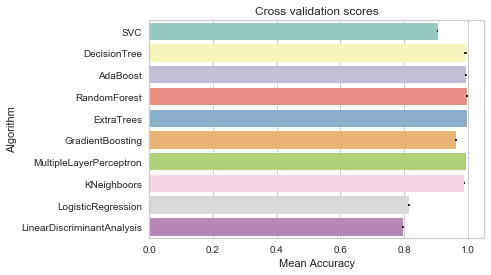

In [825]:
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [826]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(train_osx,train_osy)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 25.3min
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed: 34.1min finished
C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [828]:
gsadaDTC.best_score_

0.9941419150848394

In [830]:
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(train_osx,train_osy)

ExtC_best = gsExtC.best_estimator_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 13.5min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 40.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 189.6min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed: 276.6min finished
C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [832]:
gsExtC.best_score_

0.9989659018310576

In [892]:
#changing kfold to 3
kfold = StratifiedKFold(n_splits=3)

In [895]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="f1", n_jobs= -1, verbose = 1)

gsRFC.fit(train_osx,train_osy)

RFC_best = gsRFC.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 118.1min finished
C:\Users\Shoubhik.Dasgupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [896]:
RFC_best

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [899]:
rfpreds = gsRFC.predict(test)

In [901]:
rf_preds = pd.DataFrame()
rf_preds['loan_id'] = test_loan_id
rf_preds['m13'] = rfpreds

In [902]:
rf_preds['m13'].value_counts()

0.0    35808
1.0       58
Name: m13, dtype: int64

In [903]:
rf_preds.to_csv(r'D:\ML\Hiring\rfpreds.csv', index=False)